In [26]:
import json
import umap
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [8]:
with open("./results/raw_activations/llama31_8b_instruct_contrasting_power_over_meta.json") as json_data:
    data = json.load(json_data)
len(data["samples"])

252

In [11]:
yes_no_labels = [s["top_tokens"][0]["word"] for s in data["samples"]]
yes_no_binary_labels = []
for l in yes_no_labels:
    if l == "YES":
        yes_no_binary_labels.append(1)
    elif l == "NO":
        yes_no_binary_labels.append(0)
    else:
        yes_no_binary_labels.append(-1)

print(yes_no_binary_labels)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


100%|██████████| 32/32 [00:05<00:00,  5.94it/s]


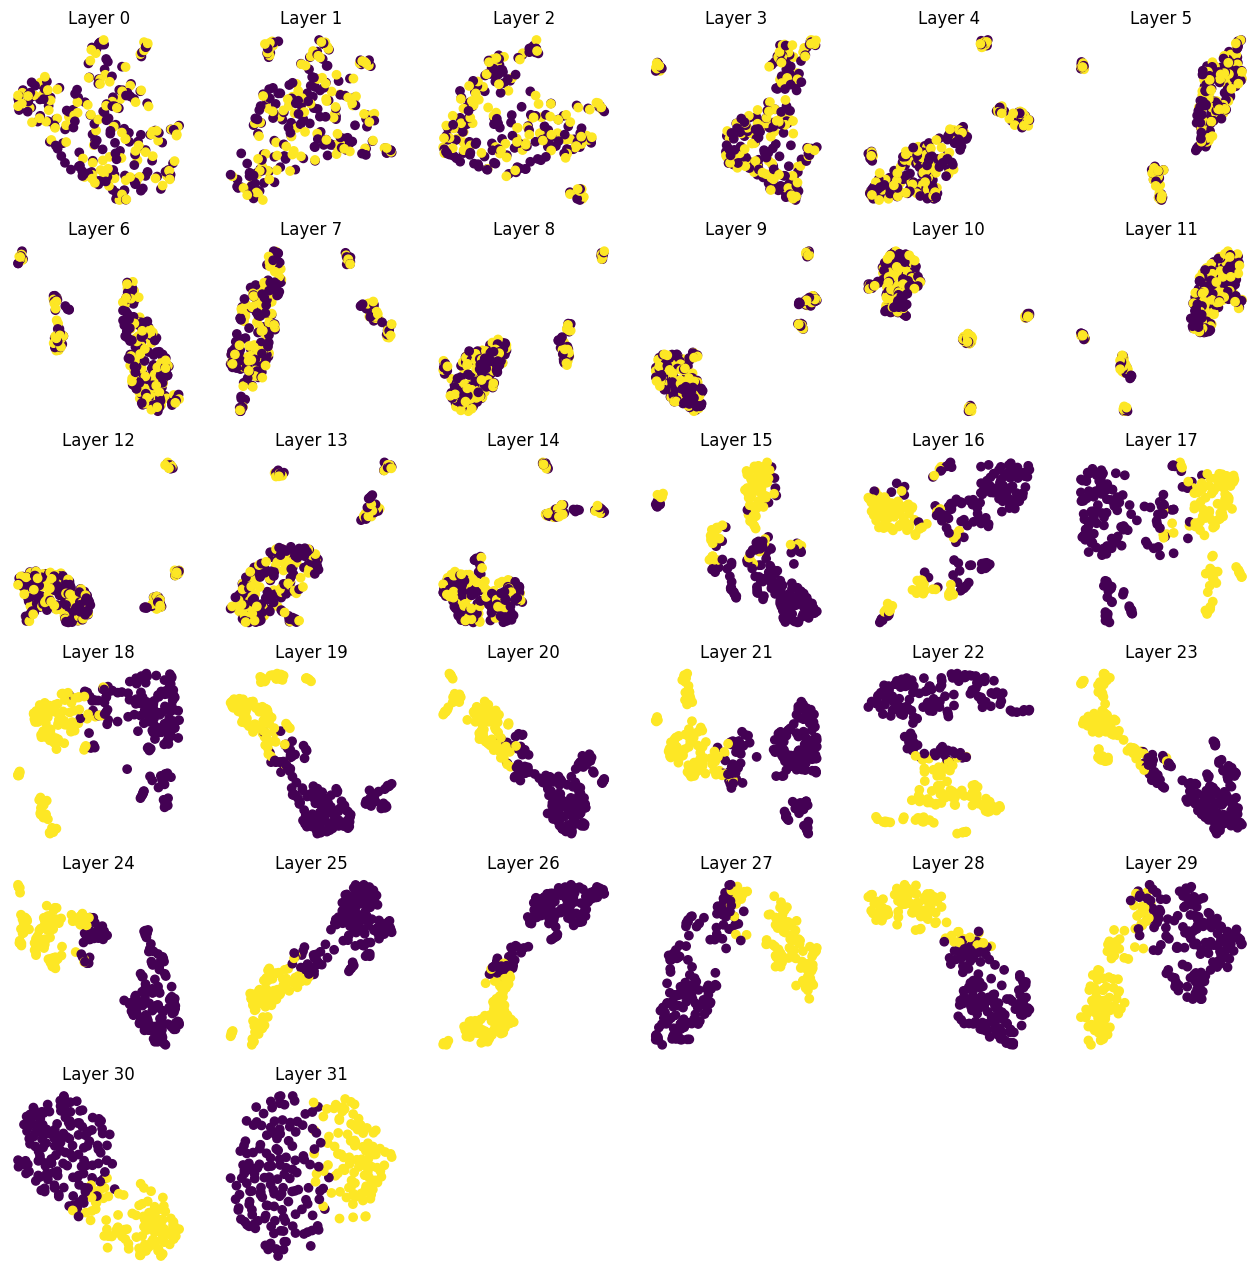

In [ ]:
correlations = np.empty()

fig, axs = plt.subplots(6, 6, figsize=(16, 16))
axs = axs.flatten()
umap_fn = umap.UMAP()
for layer in tqdm(range(32)):
    if layer < 10:
        fname = f"./results/raw_activations/llama31_8b_instruct_contrasting_power_over_layer0{layer}.npy"
    else:
        fname = f"./results/raw_activations/llama31_8b_instruct_contrasting_power_over_layer{layer}.npy"
    layer_vals = np.load(fname)
    layer_proj = umap_fn.fit_transform(layer_vals)
    axs[layer].scatter(layer_proj[:, 0], layer_proj[:, 1], c=yes_no_binary_labels)
    axs[layer].set_axis_off()
    axs[layer].set_title(f"Layer {layer}")
for i in range(32, 36):
    axs[i].set_axis_off()
plt.show()

  0%|          | 0/32 [00:00<?, ?it/s]/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normal

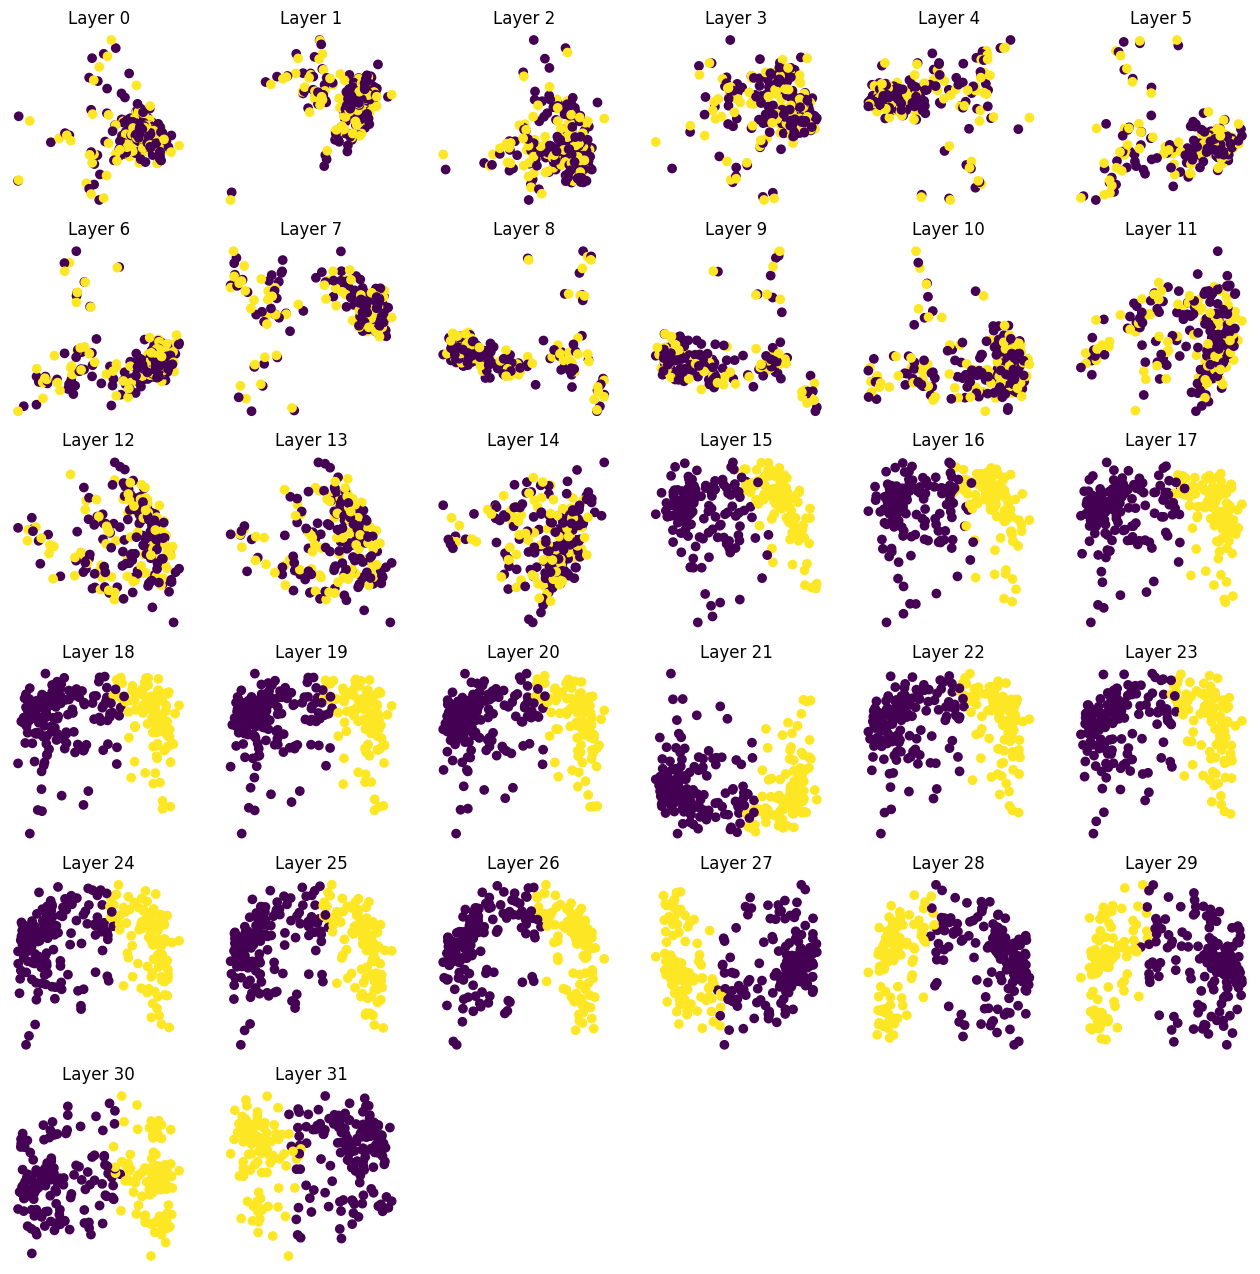

In [27]:
fig, axs = plt.subplots(6, 6, figsize=(16, 16))
axs = axs.flatten()
umap_fn = umap.UMAP()
for layer in tqdm(range(32)):
    if layer < 10:
        fname = f"./results/raw_activations/llama31_8b_instruct_contrasting_power_over_layer0{layer}.npy"
    else:
        fname = f"./results/raw_activations/llama31_8b_instruct_contrasting_power_over_layer{layer}.npy"
    layer_vals = np.load(fname)
    layer_proj = pca.fit_transform(layer_vals)
    axs[layer].scatter(layer_proj[:, 0], layer_proj[:, 1], c=yes_no_binary_labels)
    axs[layer].set_axis_off()
    axs[layer].set_title(f"Layer {layer}")
for i in range(32, 36):
    axs[i].set_axis_off()
plt.show()

In [ ]:
neuron_correlations = np.empty((32, 4096))
for layer in tqdm(range(32)):
    if layer < 10:
        fname = f"./results/raw_activations/llama31_8b_instruct_contrasting_power_over_layer0{layer}.npy"
    else:
        fname = f"./results/raw_activations/llama31_8b_instruct_contrasting_power_over_layer{layer}.npy"
    layer_vals = np.load(fname)
    for neuron in range(len(layer_vals[0])):
        neuron_correlations[layer][neuron] = 
    print(layer_vals.shape)

100%|██████████| 32/32 [00:00<00:00, 2749.35it/s]

(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
(252, 4096)
